This module uses the python package 'binarytree'. This can be installed by running 'pip install binarytree' in your command prompt/anaonda prompt


### Imports

In [62]:
from binarytree import tree, bst, build, Node
import random
import timeit
import matplotlib.pyplot as plt
import math
from bplus import *


# Tree Structures

This week we investigated trees and their associated insert, delete and search functions. This prac will provide a practical demonstration of these functions, as well as their average and worst case implementations for Binary Search Trees as well as B+ Trees


## Library Background

The library **BinaryTree**, which can be found at https://github.com/joowani/binarytree will be used throughout this practical. The full documentation may be found at the URL, but necessary information is shown below.

By default, **BinaryTree** uses the following class to represent a tree node, note that it stores the value of the current node, as well as a reference to both its left and right subtrees.

In [63]:
class Node2(object):

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

Trees can be generated by using the *bst* function, and can be visually printed with *print* as shown in the next example.

In [64]:
# Generate a random BST and return its root
my_bst = bst(height=5)

print(my_bst)


9___               
    \              
     20_________   
    /           \  
  10             42
                /  
              39   
             /     
           32      
          /        
        24         
                   


# Binary Search Trees

## Timings with 

During lectures we noted that the time taken to search a binary tree was proportional to its height (as the search may have to traverse through the tree to the deepest node).

Binary trees are, on average, Log(n) height for a random insertion of n nodes, so we would expect a search of a random tree to take O(Log(n)) time. 

But what if the tree wasn't Log(n) height? A BST with n nodes may have n height in its worst case! This means that our search will operate instead in O(n) time!

In [65]:
# A function to search a given key in BST
def search(root,key):
     
    # Base Cases: root is null or key is present at root
    if root is None or root.value == key:
        return root
 
    # Key is greater than root's key
    if root.value < key:
        return search(root.right,key)
   
    # Key is smaller than root's key
    return search(root.left,key)

# The search function implemented iteratively
def search_iterative(root, key):
    current_node = root
    while current_node is not None:
        if key == current_node.value:
            return current_node
        elif key < current_node.value:
            current_node = current_node.left
        else:  # key > current_node.key:
            current_node = current_node.right
    return None

## Insert

BST insertion begins with a search of the tree to find the correct (leaf) location to add the new value. Once this leaf is found we simply add the new value in this position and we are done. Based on this description it should be clear that the insertion algorithm will perform very similarly to the search algorithm above! 

In [66]:
def insert(root,node):
    if root is None:
        root = node
    else:
        if root.value == node.value:
            return
        elif root.value < node.value:
            if root.right is None:
                root.right = node
            else:
                insert(root.right, node)
        else:
            if root.left is None:
                root.left = node
            else:
                insert(root.left, node)

#Example insertions
root = Node(5)
insert(root, Node(4))
insert(root, Node(6))
insert(root, Node(7))


print(root)




  5    
 / \   
4   6  
     \ 
      7
       


### Delete

Binary Tree deletion is a more complex process. There are three cases we must consider
* The node is a leaf
* The node has one child
* The node has two children

In the fist case we can just remove the node.

In the second case, we replace the node with its child.

In the third case, we need to replace the node with the next smallest node (So the largest node in the left subtree), this 'predecessor' node may have 0 or 1 children so this case will fall in the first two options.

Deletion in a BST is also in Log(n) time.

Try to predict what the tree will look like after each (commented) deletion then run the code again!

In [67]:
def find_max(root):   # Gets minimum node in a subtree
    current_node = root
    while current_node.right:
        current_node = current_node.right
    return current_node


def delete(root, parent, value):
    #find the node to delete
    if (root.value == value and parent == None): #Don't delete the root
        print("Cannot delete root")
        return;
    elif value < root.value:
        delete(root.left, root, value)
    elif value > root.value:
        delete(root.right, root, value)
    else: # delete the key here
        if root.left and root.right: # if both children are present
            predecessor = find_max(root.left)
            delete(root.left, root, predecessor.value)
            root.value = predecessor.value
        elif root.left:   # if the node has only a *left* child
            if parent.value > root.value:
                parent.left = root.left
            else:
                parent.right = root.left
        elif root.right:  # if the node has only a *right* child
            if parent.value > root.value:
                parent.left = root.right
            else:
                parent.right = root.right
        else: # this node has no children
            if parent.value > value:
                parent.left = None
            else:
                parent.right = None
            
root = Node(5)
insert(root, Node(9))
insert(root, Node(6))
insert(root, Node(7))
insert(root, Node(8))
insert(root, Node(9))
insert(root, Node(10))
insert(root, Node(11))

#Try these deletions
#delete(root, None, 10)
#delete(root, None, 9)
#delete(root, None, 7)

print(root)


5______        
       \       
    ____9      
   /     \     
  6       10   
   \        \  
    7        11
     \         
      8        
               


## Timing investigation - Best Case, Average Case and Worst Case

We have said that the functions of binary search trees operate in O(Log(n)) time, but in the worst case they operate in O(n). Let's investigate the effect of a tree's balance on the running time. We will use the search function for simplicity.

Running the code below without editing it shows the comparison between the best and average cases. Note the relationships between the two graphs. Uncomment the line plotting worst case & run the code again. Note the huge difference between O(Log(n)) and O(n).

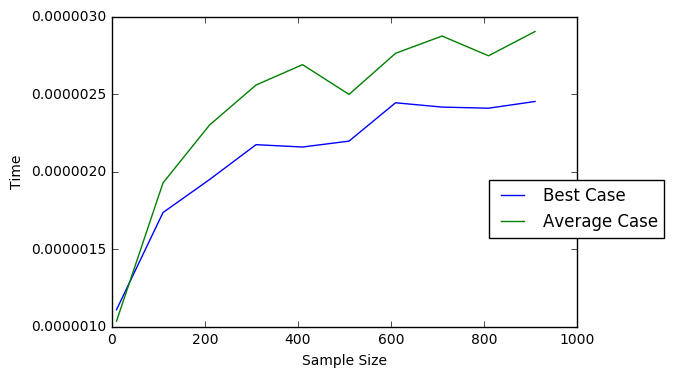

In [68]:
def worst_case(N):
    root = Node(0)
    prevNode = root
    for j in range(0,N):
        newNode = Node(j)
        prevNode.right = newNode
        prevNode = newNode
    return root

def best_case(N):
    depth = int(math.ceil(math.log(N,2))+1)
    N=math.pow(2,depth)
    balanceList = []
    for i in range(1, depth):
        denom = int(math.pow(2,i))
        for j in range(1,denom,2):
            balanceList.append(int(j*N/denom))
    return build(balanceList)

def average_case(N):
    root = Node(50000)
    for i in range(1, N):
        newNode = Node(random.randint(0,N))
        insert(root, newNode)
    return root
    
    
def binary_search_timings(N):
    numbers_to_sort = []
    worst_case_timings = []
    best_case_timings = []
    avg_case_timings = []
    
    for i in range(10,N,int(N/10)):
        numbers_to_sort.append(i);

        root = worst_case(i)
        avgTime = 0
        for j in range(0,1000):
            rand = random.randint(0,i)
            startTime = timeit.default_timer()
            search_iterative(root, rand);
            endTime = timeit.default_timer()
            avgTime = avgTime + endTime - startTime
        avgTime = avgTime/1000
        worst_case_timings.append(avgTime);
    
        root = best_case(i)
        avgTime = 0
        for j in range(0,100000):
            rand = random.randint(0,i)
            startTime = timeit.default_timer()
            search_iterative(root, rand);
            endTime = timeit.default_timer()
            avgTime = avgTime + endTime - startTime
        avgTime = avgTime/100000
        best_case_timings.append(avgTime);
        
        root = average_case(i)
        avgTime = 0
        for j in range(0,100000):
            rand = random.randint(0,i)
            startTime = timeit.default_timer()
            search_iterative(root, rand);
            endTime = timeit.default_timer()
            avgTime = avgTime + endTime - startTime
        avgTime = avgTime/100000
        avg_case_timings.append(avgTime);
        
        
    #plt.plot(numbers_to_sort,worst_case_timings,label="Worst Case")
    plt.plot(numbers_to_sort,best_case_timings,label="Best Case")
    plt.plot(numbers_to_sort,avg_case_timings,label="Average Case")
    
    plt.xlabel('Sample Size')
    plt.ylabel('Time')
    legend = plt.legend(loc='upper center', bbox_to_anchor=(1, 0.5))
    plt.show()
            
        
binary_search_timings(1000)

## 1. What insertion order gives the best case result for a binary search tree?

Answer

## 2. Given a tree with 100 nodes, what is the tree depth in the best, average, and worst case

Answer

In [69]:
#Code to find the depth of different trees

def get_best(N):
    root = best_case(N)
    return root.height

def get_avg(N):
    root = average_case(N)
    return root.height

def get_worst(N):
    root = worst_case(N)
    return root.height

def get_depths(N):
    best = get_best(N)
    avg = get_avg(N)
    worst = get_worst(N)
    print("Best case: " + str(best))
    print("Average case: " + str(avg))
    print("Worst case: " + str(worst))
    
get_depths(100)


Best case: 6
Average case: 13
Worst case: 100


## 3. Now consider a tree with N nodes, what is the depth of the tree in the best, average, and worst case?


Answer

# B+ Trees

Quite clearly the concept of tree depth (and therefore balance) is of huge importance to the running time of the tree algorithms. 

B+ Trees were investigated in class. These differ from BSTs in two main areas:
* Each node has a maximum number of children greater than 2
* The insert and deletion algorithsm must ensure the tree satisfies a balancing property - each node must be between half-full and full at all times.

This auto-balancing feature aims to balance efficient inserting with efficient searching - the tree is not perfectly balanced, but it is always close.

### Library background
We will use a full Bplus tree implementation. The tree is instantiated as a BPlusTree of order n.

In [56]:
bplus = BPlusTree(5) #Order 5

## B+ Timing Investigation

### Search

Searching a B+ tree is much the same as searching a binary tree - with the only difference being that the search value must be compared to each of the node's children, rather than being simply greater than or less than a single value. The search therefore still operates in O(Log(n)) time.

The following test compares the operating time for average case B+ and Binary Trees. Inspect the run time of B+ then uncomment the binary tree line & run the test again to compare B+ and Binary Trees.

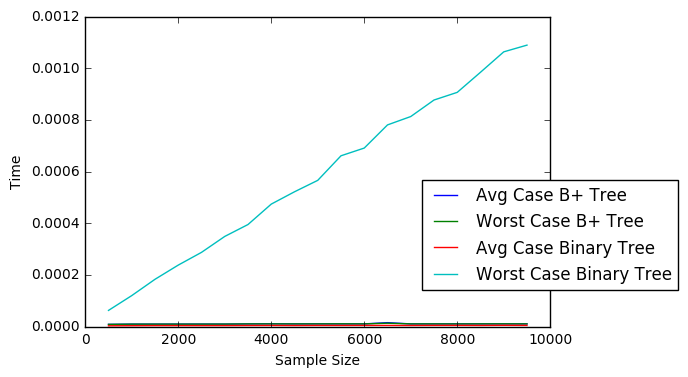

In [85]:
def makeWorstBPlus(order, N):
    bplus = BPlusTree(order)
    for i in range(0,N):
        bplus.insert(i,i)
    return bplus

def makeBPlus(order, N):
    bplus = BPlusTree(order)
    for i in range(0,N):
        rand = random.randint(0,1000000)
        bplus.insert(i,i)
    return bplus

def search_timings(N):
    numbers_to_sort = []
    worst_binary_timings = []
    avg_binary_timings = []
    worst_bplus_timings = []
    avg_bplus_timings = []

    for i in range(int(N/20),N,int(N/20)):
        numbers_to_sort.append(i);
        
        avgTime = 0
        root = worst_case(i) #Worst case binary tree
        for j in range(0,1000):
            rand = random.randint(0,i)
            startTime = timeit.default_timer()
            search_iterative(root, rand);
            endTime = timeit.default_timer()
            avgTime = avgTime + endTime - startTime
        avgTime = avgTime/1000
        worst_binary_timings.append(avgTime);
        
        avgTime = 0
        root = average_case(i) #Avg case binary tree
        for j in range(0,1000):
            rand = random.randint(0,i)
            startTime = timeit.default_timer()
            search_iterative(root, rand);
            endTime = timeit.default_timer()
            avgTime = avgTime + endTime - startTime
        avgTime = avgTime/1000
        avg_binary_timings.append(avgTime);
        
        avgTime=0
        bplus = makeBPlus(3,i)
        for j in range(0,100000):
            rand = random.randint(0,i-1)
            startTime = timeit.default_timer()
            bplus.get(1)
            endTime = timeit.default_timer()
            avgTime = avgTime + endTime - startTime
        avgTime = avgTime/100000
        avg_bplus_timings.append(avgTime);
        
        
        avgTime=0
        bplus = makeWorstBPlus(3,i)
        for j in range(0,100000):
            rand = random.randint(0,i-1)
            startTime = timeit.default_timer()
            bplus.get(1)
            endTime = timeit.default_timer()
            avgTime = avgTime + endTime - startTime
        avgTime = avgTime/100000
        worst_bplus_timings.append(avgTime);
        
        
    plt.plot(numbers_to_sort,avg_bplus_timings,label="Avg Case B+ Tree")
    plt.plot(numbers_to_sort,worst_bplus_timings,label="Worst Case B+ Tree")
    plt.plot(numbers_to_sort,avg_binary_timings,label="Avg Case Binary Tree")
    plt.plot(numbers_to_sort,worst_binary_timings,label="Worst Case Binary Tree")
    
    plt.xlabel('Sample Size')
    plt.ylabel('Time')
    legend = plt.legend(loc='upper center', bbox_to_anchor=(1, 0.5))
    plt.show()
            
        
search_timings(10000)

## 4. Why are the average and worst case searches so close in B+ trees?

Answer 

### Insert

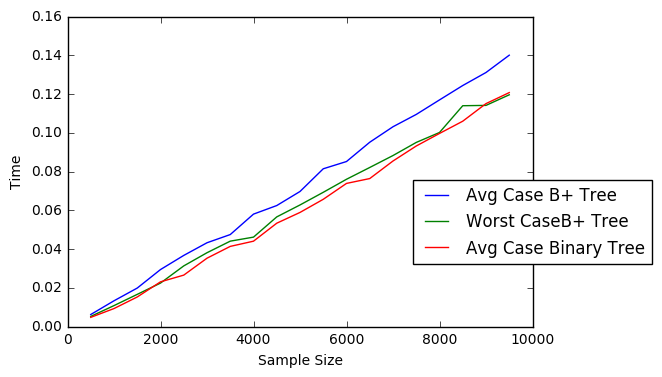

In [82]:
def insert_timings(N):
    numbers_to_sort = []
    worst_binary_timings = []
    avg_binary_timings = []
    worst_bplus_timings = []
    avg_bplus_timings = []

    for i in range(int(N/20),N,int(N/20)):
        numbers_to_sort.append(i);
        
        avgTime = 0
        for j in range(0,10):
            startTime = timeit.default_timer()
            root = worst_case(i) #Worst case binary tree
            endTime = timeit.default_timer()
            avgTime = avgTime + endTime - startTime
        avgTime = avgTime/10
        worst_binary_timings.append(avgTime);
        
        avgTime = 0
        for j in range(0,10):
            startTime = timeit.default_timer()
            root = average_case(i) #Avg case binary tree
            endTime = timeit.default_timer()
            avgTime = avgTime + endTime - startTime
        avgTime = avgTime/10
        avg_binary_timings.append(avgTime);
        
        avgTime=0
        for j in range(0,10):
            rand = random.randint(0,i-1)
            startTime = timeit.default_timer()
            bplus = makeBPlus(3,i)
            endTime = timeit.default_timer()
            avgTime = avgTime + endTime - startTime
        avgTime = avgTime/10
        avg_bplus_timings.append(avgTime);
        
        
        avgTime=0       
        for j in range(0,10):
            rand = random.randint(0,i-1)
            startTime = timeit.default_timer()
            bplus = makeWorstBPlus(3,i)
            endTime = timeit.default_timer()
            avgTime = avgTime + endTime - startTime
        avgTime = avgTime/10
        worst_bplus_timings.append(avgTime);
        
        
    plt.plot(numbers_to_sort,avg_bplus_timings,label="Avg Case B+ Tree")
    plt.plot(numbers_to_sort,worst_bplus_timings,label="Worst Case B+ Tree")
    plt.plot(numbers_to_sort,avg_binary_timings,label="Avg Case Binary Tree")
    #plt.plot(numbers_to_sort,worst_binary_timings,label="Worst Case Binary Tree")
    
    plt.xlabel('Sample Size')
    plt.ylabel('Time')
    legend = plt.legend(loc='upper center', bbox_to_anchor=(1, 0.5))
    plt.show()
    
insert_timings(10000)

# Questions

## 5. Briefly explain the key benefits of using tree implementations over arrays or lists.

Answer

## 6. Give examples of when using a B+ tree would NOT be better than using an array to store your data.

Answer

## 7. B+ Trees seek to improve binary trees in two ways - Each node points to more than 2 others, and the tree restructures itself to more balanced states. Which of these do you think contributes more to the improved performance?

Answer